# Presenting Your Work

A lot of the time you are writing code in a notebook for two reasons:

1. It helps you write code quickly and easily
2. You write Literate Code that you can send to others to have them check and run it

This notebook covers some other reasons for writing code inside notebooks.

Time: 5 minutes

## The Notebook Is In A Web Browser

For example this means it can render images, as we've seen.

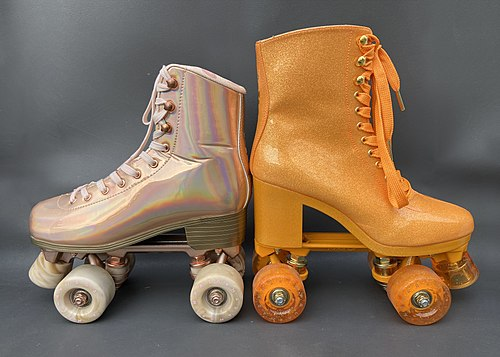

In [1]:
# Python Image Library (installed under the name `pillow`)
# We're grabbing the sub-module `Image` inside the main module
import PIL.Image

# URL library (built-in)
import urllib

# Input/Output library (built-in)
import io

# url of an image
wikimedia_commons_photo_of_the_day = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Impala_Marawa_Quad_Skates_Comparison.jpg/500px-Impala_Marawa_Quad_Skates_Comparison.jpg"

# grab the data at that url and turn it into something like a file
treated_as_file = io.BytesIO(urllib.request.urlopen(wikimedia_commons_photo_of_the_day).read())


PIL.Image.open(treated_as_file)

# This particular image:
# Was uploaded by MossAlbatross in 2022
# Under the CC BY-SA 4.0 licence
# More details are at: https://commons.wikimedia.org/wiki/Main_Page#/media/File:Impala_Marawa_Quad_Skates_Comparison.jpg

Or a map:

In [2]:
import folium

folium.Map(
    location=[51.75222, -1.25596],
    zoom_start=12
)

This is because the output of code that is run by Jupyter is allowed to be anything that a web browser can handle, which includes javascript and html functionality.

## Interactivity

There are two ways that notebooks are interactive:

1. People can alter your code and run it themselves
2. The output of your code can include interactive elements (such as a map)

**It must be noted** that this second type of interaction is harder to implement, and more liable to simply not working depending on context.

In [3]:
import ipywidgets
integer_slider_widget = ipywidgets.IntSlider()
integer_slider_widget

IntSlider(value=0)

In [4]:
integer_slider_widget.value

0

In [5]:
import seaborn as sns
import numpy as np

# Generate some random data
x, y, scale = np.random.randn(3, 1000)

def draw_a_random_scatter_plot(limit):
    """Use seaborn to make a plot.
    
    Points are normally distributed along x, y, and size.
    We only draw a limited number of points.
    """

    return sns.scatterplot(x=x[0:limit],
                    y=y[0:limit],
                    size=scale[0:limit],
                    hue=scale[0:limit],
                    legend="brief",
                    )

<Axes: >

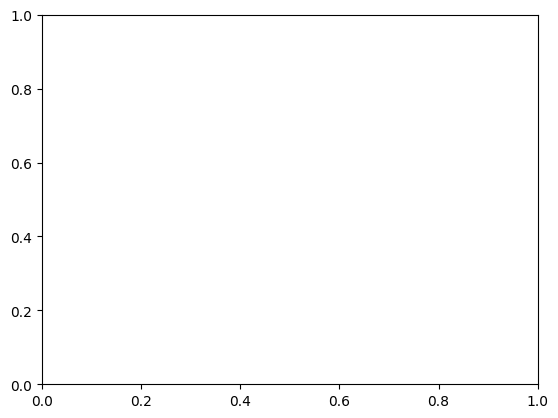

In [6]:
# Because we're just throwing in the data as a list rather than making a dataframe
# it doesn't know what to title the axes!
# So use dataframes, or even better look up the seaborn documentation
# for examples of how to set axes and titles
draw_a_random_scatter_plot(integer_slider_widget.value)

You can also register functions to run each time a widget changes.
Remember that everything in Python is an object,
and functions are therefore objects,
and arguments to functions are objects.
So passing a function to another function is perfectly okay!

Some languages get upset when you try this.

In [7]:
print("Minor Flashing Warning! Moving this slider forces redraws of the plot.")
print("The results are cached, so it's a lot smoother after they've all been drawn once.")

# We pass the `draw_a_random_scatter_plot` function to the `ipywidgets.interact` function
# We also say the name of the argument that we want to link to a slider.
ipywidgets.interact(draw_a_random_scatter_plot,
                    limit=ipywidgets.IntSlider(min=500,max=1000,step=100))

Minor Flashing Warning! Moving this slider forces redraws of the plot.
The results are cached, so it's a lot smoother after they've all been drawn once.


interactive(children=(IntSlider(value=500, description='limit', max=1000, min=500, step=100), Output()), _dom_…

<function __main__.draw_a_random_scatter_plot(limit)>

## Exporting

If, inside Jupyter, you go to `File > Save and Export Notebok As` you can see a list of options.
Some of these options (e.g. pdf) require extra software to be installed.

Exporting as html should work for everyone.
Try exporting this notebook.
You should find that the map is exported in an interactive state,
but the sliders are not.

The sliders rely on access to a Python kernel to do anything.
They're pointless without Python running in the backgroud, so **they aren't exported**.
The map doesn't use Python, it uses JavaScript (something supported natively by web browsers)
so **that is exported**.

Exporting a notebook as html (or pdf, or slides) turns it into a document that can be read by almost anyone, without them needing to run your code.

#### Exporting as html

Pros:

- People don't need Python or Jupyter installed to read an html file
- Document is clear and legible, because you wrote good markdown cells
- People can still recreate your code if they're interested

Cons:

- You lose some of the interactivity

If you want to make even nicer documents in a similar way, check out Quarto.
It's a slightly different style of writing (similar to R-markdown) but only slightly.

### Exporting as slides

Jupyter lets you mark cells as "slide" cells.
You need to enable the propery `View > Property Inspector` first.

Marking a cell as a slide cell does nothing (visible) until you choose to export the document for `Reveal.js` (the `.js` indicates that this is a JavaScript library, so works in a web browser).
Then it sets that cell as the start of a new slide.

Pros:

- Makes a slideshow inside a webpage, so it's extremely portable
- It's slides inside a web browser, so things like the map still work

Cons:

- Fiddly
- Tedious

If you really want a slideshow I would suggest exporting the notebook as a markdown and then using `pandoc`
or something similar to make slides.

### Exporting as markdown

If you export as markdown you will get a zip file containing an images that are needed to display cell outputs.

Markdown is (generally) used an an intermediate format,
meaning that you generally then turn a markdown file into something else.

Some tools, like Quarto, have you write in markdown so that they can then be made directly into webpages.

## Exporting you environment

Congratulations on getting your code running!

Your next task is to make sure other people can run it.

Things that could go wrong:

### They have the wrong version of Python

Python using something called [Semantic Versioning](https://semver.org/). Python `3.10.13` (the output of me running `python --version` in my terminal) means:

- Major version: 3
- Minor version: 10
- Patch version: 13

The major version goes up if there's an incompatible change.
The minor version goes up if there's something added which is backwards compatible.
The patch version goes up if there's a bug fix which is backwards compatible.

You therefore want someone else to run your code using:

- The same major version as you had
- The same or higher minor version as you had

Given that the Python team have said there won't be a Python 4, this problem is unlikely to occur unless you work with someone who hasn't updated Python in a very long time.

### They have the wrong packages installed

If you run `pip install [package name]`, pip will find the most recently updated version of that package and download it.

If that newer version of the package doesn't work with your code (or appears to work, but actually works _differently_) then you'll find problems.

Packages _should_ use semantic versioning,
and the same rules as above apply.

For example:

If `pandas` release a new version that changes the names of the functions (unlikely, but possible)
then your code (which used the old names) won't run with this newer version.
If they did so they should update the major version, because it's a breaking change.

#### How to fix this

You can tell pip to install particular versions, e.g. `pip install pandas==2.1.3`.

Writing out all the versions is tedious, and writing them back in to `pip` even more so.
There is a console command: `pip freeze` which lists all the installed packages along with their version numbers.

If you run `pip freeze > requirements.txt` this output will be saved as the file `requirements.txt`.
Someone else can then install exactly those versions of packages using `pip install -r requirements.txt`.
Similar instructions exist for conda.

## Virtual Environments

Sometimes you need different versions of packages for different projects.

**A Python installation will not let you have multiple versions of packages available at a time.**

So we create _virtual environments_, each of which thinks of itself as an isolated installation.
We haven't gone into them today, but they're quick and easy to set up.
When inside a virtual environment pip will install packages just for that environment.

## Randomness

There are data science method that rely on randomness,
e.g. simulated annealing or random forests.
They're very powerful, and very useful,
and people will get (hopefully subtly) different results than you if they run those methods themselves.

We fix this be setting the _seed_ of the randomness.
Randomness in computers generally relies on something external to set the seed of the generator,
but then that generator will generate the same list of numbers each time.

### Future-proofing your work

If you publish a document:

1. give it a unique identifier, and
2. save a copy of the code that generated it along with that unique identifier.

E.g. use the `petname` package to generate names like "audacious-aardvark".

You never want to be in a position where someone is questioning your output but you cannot find your code. Jupyter automatically saves notebooks as you write them, so you need to keep track of versions manually.

## Recap

A lot of the time you want to keep things as notebooks,
because they can be run (and checked) by other people.

Notebooks are interactive by the virtue of being able to see and alter the code.

Notebooks can be made (more) interactive by using widgets.

Most people don't run Python or have Jupyter installed,
and will be happier to be sent an export html file,
or pdf if you have LaTeX installed.

If you're sending a notebook to someone else:

- send them the outputs of `pip freeze` so they can quickly install exactly the same packages as you.
- Use virtual environments to separate your projects, letting you fix version of packages for some projects and not others.
- If you rely on randomness, set a random seed so everyone else gets "the same" randomness as you.